In [8]:
!pip install wget
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe8

In [1]:
import wget
import pandas as pd
import numpy as np
import tensorflow as tf
import tarfile
import os
from PIL import Image

In [2]:
#downloading the dataset
url="http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz"
wget.download(url)

#now the full file is downloaded - the fle contains 4... --> exlain four parts


'flickr_logos_27_dataset.tar (1).gz'

copied from: http://www.image.ntua.gr/iva/datasets/flickr_logos/

The Flickr Logos 27 dataset is an annotated logo dataset downloaded from Flickr and contains more than four thousand classes in total. It consists of three image collections/sets.

The training set contains 810 annotated images, corresponding to 27 logo classes/brands (30 images for each class). All images are annotated with bounding boxes of the logo instances in the image. We allow multiple logo instances per class image. The training set is randomly split in six subsets, each one containing five images per class.

The distractor set contains 4207 logo images/classes, that depict, in most cases, clean logos. All images come from the Flickr group Identity + Logo Design. Each one of the distractor set images defines its own logo class and we regard the whole image as bounding box.

Finally, the query set consists of 270 images. There are five images for each of the 27 annotated classes, summing up to 135 images that contain logos. Furthermore, the query set contains 135 Flickr images that do not depict any logo class, giving 270 test images in total.

The 27 Annotated Logo Classes/Brands
The brands included in the dataset are: Adidas, Apple, BMW, Citroen, Coca Cola, DHL, Fedex, Ferrari, Ford, Google, Heineken, HP, McDonalds, Mini, Nbc, Nike, Pepsi, Porsche, Puma, Red Bull, Sprite, Starbucks, Intel, Texaco, Unisef, Vodafone and Yahoo.

In [3]:
#to access the files, we need to open the tar file

#path to tar.gz file
tar_file_path = r'C:\Users\EmiliaGachowetz-Gepp\Documents\New ML\flickr_logos_27_dataset.tar.gz'

#Open the tar.gz file
with tarfile.open(tar_file_path, 'r:gz') as tar:
    #Extract all contents to a newlz created directory
    tar.extractall(path='unzipped')

In [4]:
#1. read the images

#again we need to open a second tar file with the iamges:
tar_file_path_2 =r"C:\Users\EmiliaGachowetz-Gepp\Documents\New ML\unzipped\flickr_logos_27_dataset\flickr_logos_27_dataset_images.tar.gz"

#Open the tar.gz file
with tarfile.open(tar_file_path_2, 'r:gz') as tar:
    #Extract all contents to a newlz created directory
    tar.extractall(path='images')

#now we have a file, containg all the images

In [44]:
# Specify the path to your directory containing image files
image_directory = r'C:\Users\EmiliaGachowetz-Gepp\Documents\New ML\images\flickr_logos_27_dataset_images'

# Get a list of all files in the directory
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Create an empty DataFrame
image_df = pd.DataFrame()

# Iterate through image files and append to the DataFrame
for index, image_file in enumerate(image_files):
    try:
        # Construct the full path to the image file
        image_path = os.path.join(image_directory, image_file)

        # Open the image using Pillow (PIL)
        img = Image.open(image_path)

        # Resize the image to 227x227 pixels using LANCZOS resampling filter
        img_resized = img.resize((227, 227), Image.LANCZOS)

        # Convert the resized image to a 1D NumPy array (flatten the image)
        img_array = np.array(img_resized.convert('L')).flatten()

        # Create a new DataFrame row with image data
        new_row = pd.DataFrame([img_array], columns=[f'pixel_{i}' for i in range(len(img_array))])

        # Append the new row to the image_df
        image_df = pd.concat([image_df, new_row], ignore_index=True)

    except Exception as e:
        # Handle errors (e.g., if the image cannot be processed)
        print(f"Error processing image at index {index}: {e}")

# Display the new DataFrame containing image data
print(image_df)


      pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0          47       47       45       45       47       46       48       45   
1         255      255      254      254      255      254      255      255   
2          86       88       88       86       84       88       93       95   
3          51       52       54       56       58       59       61       62   
4         131      123      107       88       73       65       60       59   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1074      136      150      168      156      158      152      160      155   
1075      102      179      163      104       38       24       27       26   
1076      255      255      255      255      255      255      255      255   
1077       52       51       57       51       56       59       54       57   
1078       51       50       52       51       53       52       52       53   

      pixel_8  pixel_9  ...  pixel_5151

In [48]:
image_df.shape

(1079, 51529)

In [10]:
#reshape to a numpy array:
image_array = image_df.values
image_array.shape

(1079, 51529)

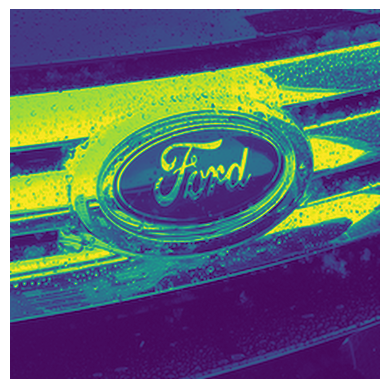

In [11]:
#lets look at one picture from the data
import matplotlib as mpl
import matplotlib.pyplot as plt

some_pic=image_array[0]
some_pic_image=some_pic.reshape((227,227))

plt.imshow(some_pic_image, interpolation="lanczos")
plt.axis("off")
plt.show()

In [5]:
#2. read csv which contains information about images
images=pd.read_csv(r"C:\Users\EmiliaGachowetz-Gepp\Documents\New ML\unzipped\flickr_logos_27_dataset\flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+', header=None)
images

,0,1,2,3,4,5,6
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93
...,...,...,...,...,...,...,...
4531,2126991906.jpg,Yahoo,6,15,6,253,54
4532,217288720.jpg,Yahoo,6,136,161,304,222
4533,2472817996.jpg,Yahoo,6,2,4,499,106
4534,2514220918.jpg,Yahoo,6,1,69,342,157


The data frame is built like this:
Image filename (unique ID)
Class name (i.e. the label)
Training subset of class (1,...,6)
Coordinates of the top left and bottom right corners (x1 y1 x2 y2)

In [6]:
#renaming the columns correspondingly:
new_column_names = ['Image ID', 'Label', 'Subset', 'x1', 'y1','x2', 'y2']
images.columns=new_column_names
images.head()

,Image ID,Label,Subset,x1,y1,x2,y2
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93


In [9]:
##save and reload

# Save the dataset using NumPy's .npz format
#np.savez("my_dataset.npz", images=image_array)


# Load the dataset
loaded_data = np.load("my_dataset.npz")

# Access images and labels
loaded_images = loaded_data['images']

# Now you can use loaded_images and loaded_labels in your code
image_df=pd.DataFrame(loaded_images)
image_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51519,51520,51521,51522,51523,51524,51525,51526,51527,51528
0,47,47,45,45,47,46,48,45,44,46,...,8,10,11,11,8,10,11,12,10,11
1,255,255,254,254,255,254,255,255,255,253,...,251,254,254,254,254,255,255,255,255,255
2,86,88,88,86,84,88,93,95,96,97,...,2,2,2,2,2,1,1,1,1,1
3,51,52,54,56,58,59,61,62,63,65,...,25,24,27,31,34,38,41,43,40,38
4,131,123,107,88,73,65,60,59,61,62,...,99,95,91,88,84,82,79,76,74,71


In [ ]:
#maybe useful:
def loadPretrainedModel(name):
    model = load_model(name)
    print("Loaded pretrained model with weights from disk")
    return model
###############################################################################################################################
###Remember to change the all variables (especially weightsFile name) before executing the code.
###############################################################################################################################
#Directory names of the folders that contain the images that need to be trained and tested for.
trainDir = 'Flickr27//CTrain-GreyScale'
testDir = 'Flickr27//CValidation-GreyScale'

#The list of class names for which label binarizer is run
class_names = ['Apple', 'Fedex', 'Google']

#channels = 3 ==> RGB or HSV images, channels = 1 ==> Greyscale images
channels = 1

#Normalization value should be 255 for RGB or Greyscale images. It should be 1 for HSV images.
normalizationVal = 255.0

#Pretrained Model Filename
modelFileName = 'Models//NewIV3-150x150x1-3C.h5'
withPreTrainedWeights = False #Greyscale model has no pretrained weights. Keep this as false.

#The filename in which the output weights would be stored.
outputWeightsFileName = 'NewIV3-150x150x1-3C-Run1.hdf5'

#Other parameters
epochs = 100
batchsize = 32
learningRate = 0.001
monitorVariable = 'val_categorical_accuracy'
monitorMode = 'max'

#Converting the images to numpy arrays
X_train = []
y_train = []

X_test = []
y_test = []

#For the train images
for dirname in os.listdir(trainDir):
    if dirname in class_names:
        classdir = trainDir + '//' + dirname
        for filename in os.listdir(classdir):
            if filename.endswith('.jpg'):
                fnWithPath = classdir + '//' + filename
                image_data = skimage.io.imread(fnWithPath)
                new_image_data = skimage.transform.resize(image_data,(150,150,channels))
                new_image_data = new_image_data.reshape((1, 150, 150, channels)).astype(np.float32) / normalizationVal
                X_train.append(new_image_data)
                y_train.append(dirname)
        
#For the validation images
for dirname in os.listdir(testDir):
    if dirname in class_names:
        classdir = testDir + '//' + dirname
        for filename in os.listdir(classdir):
            if filename.endswith('.jpg'):
                fnWithPath = classdir + '//' + filename
                image_data = skimage.io.imread(fnWithPath)
                new_image_data = skimage.transform.resize(image_data,(150,150,channels))
                new_image_data = new_image_data.reshape((1, 150, 150, channels)).astype(np.float32) / normalizationVal
                X_test.append(new_image_data)
                y_test.append(dirname)

                
print(np.size(X_train))
print(np.size(y_train)) #The total number of train images per class
print(np.size(X_test))
print(np.size(y_test))  #The total number of test images per class


X_train = np.reshape(X_train,(np.size(y_train),150,150,channels))
y_train = np.reshape(y_train,(np.size(y_train),1))
X_test = np.reshape(X_test,(np.size(y_test),150,150,channels))
y_test = np.reshape(y_test,(np.size(y_test),1))
y_train = label_binarize(y_train, classes = class_names)
y_test = label_binarize(y_test, classes = class_names)

model = loadPretrainedModel(modelFileName)


#Will run if there are pretrained weights by setting the layers as not trainable. This will be transfer learning. 
if withPreTrainedWeights:
    for layer in model.layers[:-1]:
        layer.trainable = False
        
model.summary()

opt = optimizers.RMSprop(lr=learningRate)

model.compile(optimizer = opt, 
              loss      = 'categorical_crossentropy', 
              metrics   = ['categorical_accuracy'])
checkpointer = ModelCheckpoint(filepath       = outputWeightsFileName, 
                               monitor        = monitorVariable, 
                               verbose        = 1, 
                               save_best_only = True, 
                               mode           = monitorMode)
#Executing the model
history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    shuffle         = True,
                    epochs          = epochs, 
                    verbose         = 1, 
                    batch_size      = batchsize, 
                    callbacks       =[checkpointer])

#Summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Load Data with file names

In [18]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Specify the path to your directory containing image files
image_directory = r'C:\Users\EmiliaGachowetz-Gepp\Documents\New ML\images\flickr_logos_27_dataset_images'

# Get a list of all files in the directory
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Create an empty DataFrame
image_df = pd.DataFrame()

# Iterate through image files and append to the DataFrame
for index, image_file in enumerate(image_files):
    try:
        # Construct the full path to the image file
        image_path = os.path.join(image_directory, image_file)

        # Open the image using Pillow (PIL)
        img = Image.open(image_path)

        # Resize the image to 227x227 pixels using LANCZOS resampling filter
        img_resized = img.resize((227, 227), Image.LANCZOS)

        # Convert the resized image to a 1D NumPy array (flatten the image)
        img_array = np.array(img_resized.convert('L')).flatten()

        # Create a new DataFrame row with image data and file name
        new_row = pd.DataFrame([img_array], columns=[f'pixel_{i}' for i in range(len(img_array))])
        new_row['file_name'] = image_file  # Add a new column for file name

        # Append the new row to the image_df
        image_df = pd.concat([image_df, new_row], ignore_index=True)

    except Exception as e:
        # Handle errors (e.g., if the image cannot be processed)
        print(f"Error processing image at index {index}: {e}")

# Display the new DataFrame containing image data and file names
print(image_df)


      pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0          47       47       45       45       47       46       48       45   
1         255      255      254      254      255      254      255      255   
2          86       88       88       86       84       88       93       95   
3          51       52       54       56       58       59       61       62   
4         131      123      107       88       73       65       60       59   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1074      136      150      168      156      158      152      160      155   
1075      102      179      163      104       38       24       27       26   
1076      255      255      255      255      255      255      255      255   
1077       52       51       57       51       56       59       54       57   
1078       51       50       52       51       53       52       52       53   

      pixel_8  pixel_9  ...  pixel_5152

In [19]:
image_array_2 = image_df.values
np.savez("my_dataset_2.npz", images=image_array_2)